In [8]:
import pandas as pd
from umap.umap_ import UMAP
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [66]:
data_1 = pd.read_csv('model/data/data_hacaton_1.csv')
data_2 = pd.read_csv('model/data/data_hacaton_2.csv').drop('отказ',axis=1)
data = pd.concat([data_1,data_2],axis=1)
data.fillna(0,inplace=True)
data.drop(['месяц','год'],axis=1,inplace=True)
data.head()

,инцидентов,дней_устранение_среднее,различных_групп_нарушений,различных_видов,отказ,"Группа_АВЗ, склад ШЧ",Группа_АЛС,"Группа_АРМ, ПО",Группа_Автопереключатели,Группа_Автошлагбаумы,...,Вид_Просрочена проверка по графику ТО,Вид_Прочие,Вид_Пыль на приборах,Вид_Разбита наружная линза (светофильтр),Вид_Разгерметизирован привод,Вид_Соединители,Вид_Стрелочная изоляция,Вид_Схема не соответствует действующим устройствам,Вид_Схемы не разложены согласно описи,Вид_Устройства электропитания в целом
0,6,9.000000,5,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,8.800000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21,13.857143,5,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,10.625000,3,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,22.900000,5,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
X = data.drop('отказ',axis=1)
y = data['отказ']

In [58]:
transformer = Normalizer().fit(X)
X = transformer.transform(X)

<AxesSubplot: >

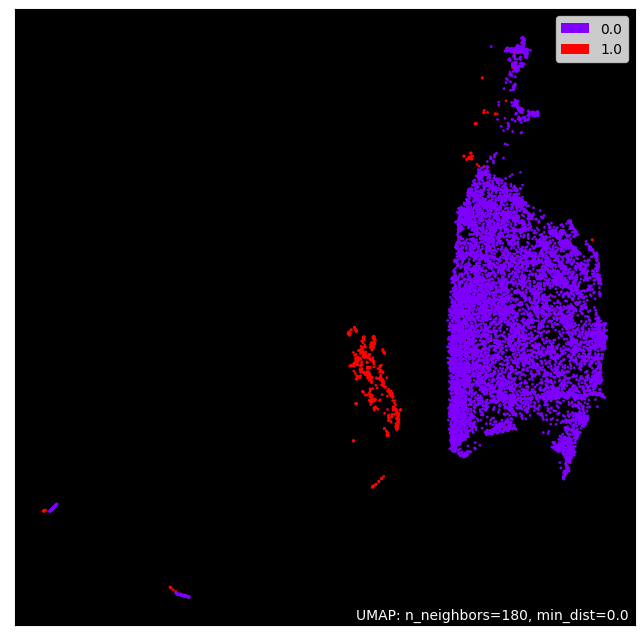

In [69]:
import umap.plot 
manifold = UMAP(n_components=2,n_neighbors=180,min_dist=0.0000).fit(X, y)
umap.plot.points(manifold, labels=y, theme="fire")

In [70]:
X_umapp = manifold.transform(X)

In [71]:
X_train,X_test,ytrain,ytest = train_test_split(X_umapp,y,random_state=42,test_size=0.2)

In [72]:
from sklearn.svm import SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, ytrain)

SVC(probability=True, random_state=42)

In [73]:
clf = CatBoostClassifier(iterations = 4000 , l2_leaf_reg = 10, depth = 6 ,learning_rate=0.055,random_state=42)
clf.fit(X_train, ytrain)

0:	learn: 0.5548844	total: 49.8ms	remaining: 3m 19s
1:	learn: 0.4429330	total: 55.6ms	remaining: 1m 51s
2:	learn: 0.3591620	total: 61.1ms	remaining: 1m 21s
3:	learn: 0.2917801	total: 65.9ms	remaining: 1m 5s
4:	learn: 0.2393234	total: 70.7ms	remaining: 56.5s
5:	learn: 0.1933666	total: 78ms	remaining: 51.9s
6:	learn: 0.1621772	total: 88.5ms	remaining: 50.5s
7:	learn: 0.1337155	total: 94.5ms	remaining: 47.2s
8:	learn: 0.1112282	total: 99.2ms	remaining: 44s
9:	learn: 0.0969932	total: 107ms	remaining: 42.7s
10:	learn: 0.0841515	total: 112ms	remaining: 40.7s
11:	learn: 0.0711497	total: 116ms	remaining: 38.6s
12:	learn: 0.0641186	total: 121ms	remaining: 37.1s
13:	learn: 0.0564395	total: 127ms	remaining: 36.2s
14:	learn: 0.0501267	total: 144ms	remaining: 38.3s
15:	learn: 0.0454579	total: 158ms	remaining: 39.3s
16:	learn: 0.0427945	total: 167ms	remaining: 39s
17:	learn: 0.0400707	total: 185ms	remaining: 41s
18:	learn: 0.0380191	total: 194ms	remaining: 40.6s
19:	learn: 0.0347127	total: 201ms	rem

In [74]:
pred = clf.predict(X_test)
pred_svc = svc.predict(X_test)

In [75]:
print('CatBoostClassifier')
print(f1_score(ytest,pred,average='macro'))
print(confusion_matrix(ytest,pred))
print('SVC')
print(f1_score(ytest,pred_svc,average='macro'))
print(confusion_matrix(ytest,pred_svc))

CatBoostClassifier
0.984902777642904
[[2187    2]
 [   6  137]]
SVC
0.9643705947061779
[[2189    0]
 [  18  125]]


In [76]:
final = pd.DataFrame()
final['отказ']=ytest
final['прогноз']=pred
final['вероятность отказа'] = clf.predict_proba(X_test)[:,1]
final.to_csv('Final.csv',index=False)